In [8]:
import numpy as np
import matplotlib.pyplot as plt
a = 1.0        # potential parameter a
b = 1.0        # potential parameter b
D = 0.5       # noise intensity (increased from smaller value)
tau = 0.05     # correlation time
x0 = 1.0       # initial position (in the right basin)
threshold = 0.0
dt = 0.001     # time step
T_max = 1000.0 # maximum simulation time
N_traj = 20000 # number of trajectories (large for good statistics)


fpt_array = np.array(fpt_array)
MFPT_sim = np.mean(fpt_array)
print(f"Number of successful crossings = {len(fpt_array)} out of {N_traj}")
print(f"Simulated MFPT = {MFPT_sim:.3f}")


Number of successful crossings = 334 out of 20000
Simulated MFPT = 474.936


Theoretical MFPT (Fox approximation) = 8.106
Relative error = 98.29%


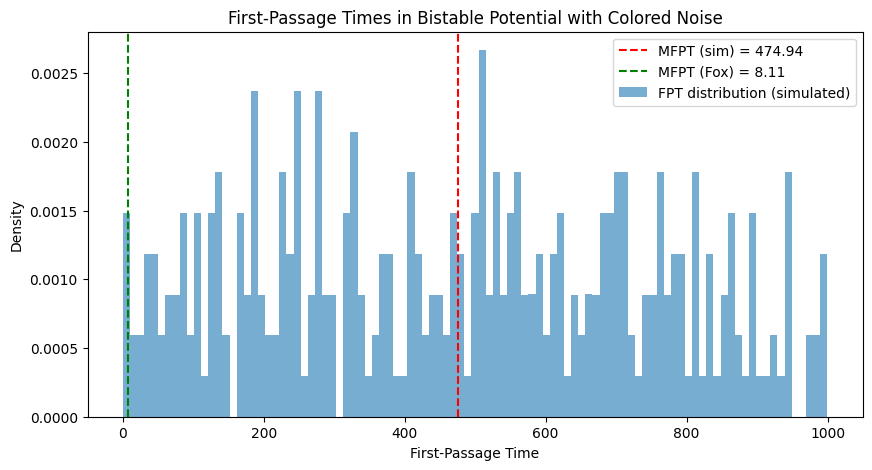

In [9]:
fpt_array1 = fpt_array


# =========================
# 5. THEORETICAL (FOX 1986) APPROXIMATION
# =========================
# For U(x) = -1/2 x^2 + 1/4 x^4, we have:
#   U''(0) = -1, U''(±1) = 2.
# The barrier is at x=0; minima are at x = ±1.
#
# According to Fox's leading-order approximation for additive colored noise:
#   T_approx ~ [2π / sqrt(|U''(0)| * U''(1))] * 1 / [1 - (a) tau] * exp[(a / (4 b D)) (1 + 2 a tau)]
#
# Here a = 1, b = 1 => U''(0) = -1, U''(1) = 2
# => prefactor = 2π / sqrt(1 * 2) = 2π / sqrt(2) = sqrt(2)π
# => T_Fox = sqrt(2)π / [1 - tau] * exp[(1 / (4*1*D)) (1 + 2 tau)] 
# but let's keep it consistent with the standard form:
import math

Upp0 = 1.0   # abs(U''(0)) = 1
Upp1 = 2.0   # U''(1) = 2
prefactor = 2.0 * math.pi / math.sqrt(Upp0 * Upp1)  # = 2π / sqrt(2) = sqrt(2) π

# We want 1/(1 - a tau) => a=1 => (1 - tau)
denominator = (1.0 - tau)
exponential = math.exp((1.0/(4.0 * D)) * (1.0 + 2.0 * 1.0 * tau))

T_fox = prefactor / denominator * exponential

print(f"Theoretical MFPT (Fox approximation) = {T_fox:.3f}")

# =========================
# 6. COMPARE & PLOT
# =========================
rel_error = abs(T_fox - MFPT_sim) / MFPT_sim
print(f"Relative error = {rel_error*100:.2f}%")

#  Plot histogram of FPT
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
bins = np.linspace(0, np.nanmax(fpt_array), 100)
hist, edges = np.histogram(fpt_array, bins=bins, density=True)
centers = 0.5*(edges[1:] + edges[:-1])

plt.bar(centers, hist, width=(edges[1]-edges[0]), alpha=0.6, label="FPT distribution (simulated)")
plt.axvline(MFPT_sim, color='r', linestyle='--', label=f"MFPT (sim) = {MFPT_sim:.2f}")
plt.axvline(T_fox, color='g', linestyle='--', label=f"MFPT (Fox) = {T_fox:.2f}")

plt.title("First-Passage Times in Bistable Potential with Colored Noise")
plt.xlabel("First-Passage Time")
plt.ylabel("Density")
plt.legend()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def U_prime(x):
    """
    Bistable potential U(x) = -1/2 x^2 + 1/4 x^4
    => derivative U'(x) = -x + x^3
    """
    return -x + x**3

def simulate_colored_bistable(x0, dt, T_max, tau, D, threshold):
    """
    Simulate one trajectory from x(0) = x0 in the overdamped equation:
        dx/dt = -U'(x) + y
        dy/dt = -y/tau + sqrt(2D/tau)*xi(t),
    using an Euler-Maruyama scheme.

    Return the first time t at which x <= threshold.
    If it never crosses by T_max, return np.nan.
    """
    x = x0
    # Ornstein-Uhlenbeck variable y: mean=0, var=D/tau at stationarity
    y = np.sqrt(D/tau)*np.random.randn()

    t = 0.0
    while t < T_max:
        # Update x
        x += (-U_prime(x) + y)*dt
        # Update y (OU process)
        y += (-y/tau)*dt + np.sqrt(2*D/tau)*np.sqrt(dt)*np.random.randn()
        t += dt

        if x <= threshold:
            return t

    # If no crossing within T_max:
    return np.nan

# --------------------------
# MAIN SCRIPT
# --------------------------
# Potential parameters are fixed at a=1, b=1 for U(x).
# Adjust the following to ensure enough crossings:
D = 0.5       # Noise intensity (try 0.4 or higher)
tau = 0.01    # Correlation time (small so Fox's formula is more valid)
x0 = 1.0      # Start in right basin
threshold = 0.0
dt = 1e-3
T_max = 10.0
N_traj = 10000  # Increase if needed for better statistics

fpt_list = []
for i in range(N_traj):
    T_fp = simulate_colored_bistable(x0, dt, T_max, tau, D, threshold)
    if not np.isnan(T_fp):
        print('----------', i, T_fp)
        fpt_list.append(T_fp)
    # Optional: print progress
    if i % 1000 == 0:
        print(f"Trajectory {i} done.")

fpt_array = np.array(fpt_list)
num_crossers = len(fpt_array)
print(f"Crossings observed: {num_crossers} out of {N_traj}")

if num_crossers == 0:
    print("No crossings observed. Try increasing D or T_max further.")
    exit()

# Simulated MFPT
MFPT_sim = np.mean(fpt_array)
print(f"Simulated MFPT = {MFPT_sim:.3f}")


Trajectory 0 done.
Trajectory 1000 done.
Trajectory 2000 done.
Trajectory 3000 done.
Trajectory 4000 done.
Trajectory 5000 done.
Trajectory 6000 done.
Trajectory 7000 done.
Trajectory 8000 done.
Trajectory 9000 done.
Crossings observed: 0 out of 10000
No crossings observed. Try increasing D or T_max further.
Simulated MFPT = nan


/home/anita/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anita/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:

# --------------------------
# Fox 1986 Approx. (leading order)
# --------------------------
# For U(x) = -1/2 x^2 + 1/4 x^4 => minima at ±1, barrier at x=0
# => U''(0) = -1 (abs value 1), U''(±1) = 2
# => Prefactor = 2π / sqrt(1*2) = sqrt(2)π
# => Leading-order colored noise correction factor ~ 1/(1 - tau)*exp[(1/(4D))*(1 + 2 tau)]
Upp0 = 1.0  # abs(U''(0))=1
Upp1 = 2.0  # U''(±1)=2
prefactor = 2.0*math.pi / math.sqrt(Upp0*Upp1)  # sqrt(2)*π
denominator = (1.0 - tau)
exponential = math.exp((1.0/(4.0*D))*(1.0 + 2.0*tau))
T_fox = (prefactor/denominator)*exponential

print(f"Theoretical MFPT (Fox, leading order) = {T_fox:.3f}")
rel_error = abs(T_fox - MFPT_sim)/MFPT_sim
print(f"Relative error vs. Fox = {rel_error*100:.2f}%")

# --------------------------
# Plot the distribution of FPT
# --------------------------
bins = 50
t_max_plot = max(np.max(fpt_array), MFPT_sim, T_fox)
hist_vals, bin_edges = np.histogram(fpt_array, bins=bins, range=(0, t_max_plot), density=True)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(9,5))
plt.bar(bin_centers, hist_vals, width=bin_edges[1]-bin_edges[0], alpha=0.6,
        label="FPT distribution (simulated)")
plt.axvline(MFPT_sim, color='red', linestyle='--', label=f"MFPT (sim) = {MFPT_sim:.2f}")
plt.axvline(T_fox, color='green', linestyle='--', label=f"Fox (1986) = {T_fox:.2f}")
plt.title("First-Passage Times in Bistable Potential with Colored Noise")
plt.xlabel("First-Passage Time")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


0.7071067811865476
x=-1 at t =  1651.0299999678703
x=-1 at t =  1651.0309999678702
x=-1 at t =  1651.0319999678702
x=-1 at t =  1651.0329999678702
x=-1 at t =  1651.0339999678702
x=-1 at t =  1651.0349999678701
x=-1 at t =  1651.03599996787
x=-1 at t =  1651.03699996787
x=-1 at t =  1651.03799996787
x=-1 at t =  1651.03899996787
x=-1 at t =  1651.03999996787
x=-1 at t =  1651.04099996787
x=-1 at t =  1651.04199996787
x=-1 at t =  1651.04299996787
x=-1 at t =  1651.04399996787
x=-1 at t =  1651.04499996787
x=-1 at t =  1651.0459999678699
x=-1 at t =  1651.0469999678699
x=-1 at t =  1651.0479999678698
x=-1 at t =  1651.0489999678698
x=-1 at t =  1651.0499999678698
x=-1 at t =  1651.0509999678698
x=-1 at t =  1651.0519999678697
x=-1 at t =  1651.0529999678697
x=-1 at t =  1651.0539999678697
x=-1 at t =  1651.0549999678697
x=-1 at t =  1651.0559999678696
x=-1 at t =  1651.0569999678696
x=-1 at t =  1651.0579999678696
x=-1 at t =  1651.0589999678696
x=-1 at t =  1651.0599999678695
x=-1 at t

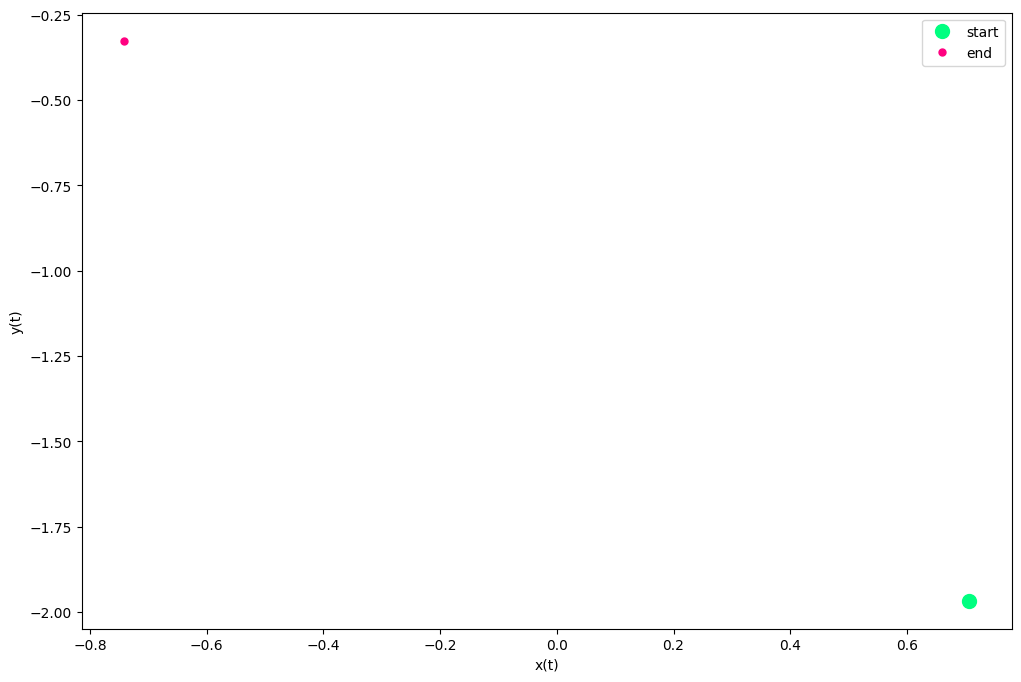

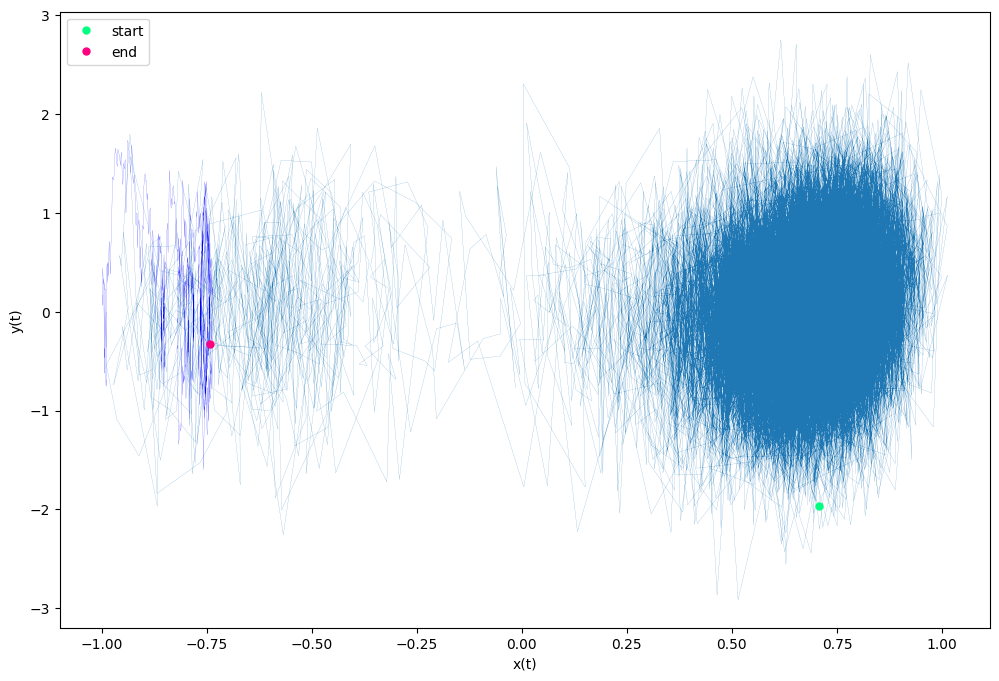

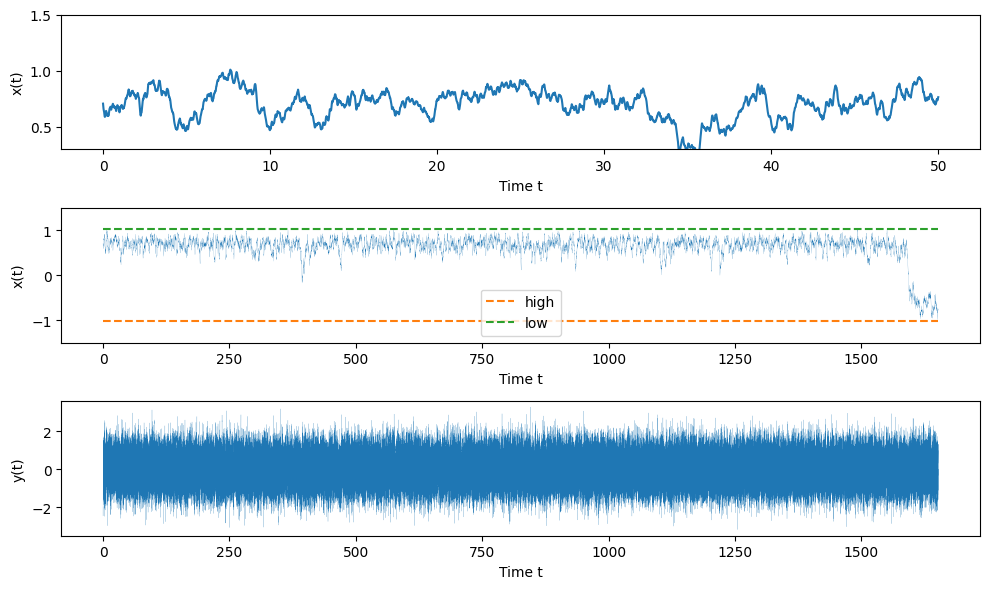

x \in [ -1.0134933354857811 1.0197907385904987 ]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
def U_prime(x, a, b):
    """
    Derivative of U(x) = -1/2 x^2 + 1/4 x^4
    => U'(x) = -x + x^3
    """
    return -a*x + b*x**3

def plot_trajectory(x0, dt, T_max, tau, D, threshold, a, b):

    """
    Simulate one trajectory of the system:
      dx/dt = -U'(x) + y,
      dy/dt = -y/tau + sqrt(2D/tau)*xi(t)
    until x crosses the threshold (x <= threshold).
    Returns the first-passage time.
    """
    t = 0.0
    x = x0
    # stationary distribution: mean 0, variance D/tau.
    y0 = np.sqrt(D/tau) * np.random.randn()
    y = y0
    x_list = [x0]
    y_list = [y0]
    t_list = [0]
    t_cross = -1
    while t < T_max:
        # Euler-Maruyama updates:
        x += (-U_prime(x, a, b,) + y) * dt
        y += (-y/tau) * dt + np.sqrt(2*D/tau) * np.sqrt(dt) * np.random.randn()
        t += dt
        x_list.append(x)
        y_list.append(y)
        t_list.append(t)
        if x <= threshold:
            t_cross = t
            T_max = t+1000*dt
            print('x=-1 at t = ', t)
    if t_cross == -1:
        print('x \in [', min(x_list), max(x_list), ']')
        return -1
    print(len(x_list))
    fig = plt.figure(figsize=(12, 8))
    i_range = 10
    for i in range(i_range):
        plt.plot(x_list[len(x_list)-1-i*100 : len(x_list)-1-(i+1)*100+2], 
                 y_list[len(x_list)-1-i*100 : len(x_list)-1-(i+1)*100+2], 
                 color = (i/i_range, 1-i/i_range, 0.5), lw = 1)
    plt.plot(x0, y0, 'o', ms = 10, color = (0, 1, 0.5), label = 'start')
    #plt.plot(x_list[i_range*100 - 1:], y_list[i_range*100 - 1:],  color = (1, 0, 0.5), label = 'last '+ str(np.round(i_range*100/len(x_list), 5)) + '% of trajectory')
    plt.plot(x, y, 'o', color = (1, 0, 0.5),  ms = 5, label = 'end')
    plt.legend()
    plt.xlabel("x(t)")
    plt.ylabel("y(t)")
    plt.show()
    
    fig = plt.figure(figsize=(12, 8))
    plt.plot(x_list[0:len(x_list):100], y_list[0:len(x_list):100], lw = 0.1)
    plt.plot(x_list[-1000:], y_list[-1000:], 'b', lw = 0.1)
    plt.plot(x0, y0, 'o', ms = 5, color = (0, 1, 0.5), label = 'start')
    plt.plot(x, y, 'o', color = (1, 0, 0.5), ms = 5, label = 'end')
    plt.legend()
    plt.xlabel("x(t)")
    plt.ylabel("y(t)")
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.subplot(3,1,1)
    plt.plot(t_list[:i_range*5000], x_list[:i_range*5000])
    plt.xlabel("Time t")
    plt.ylabel("x(t)")
    plt.ylim([0.3, 1.5])

    plt.subplot(3,1,2)
    plt.plot(t_list[0:len(x_list):100], x_list[0:len(x_list):100], lw = 0.1)
    plt.plot([0, t], [min(x_list), min(x_list)], '--', label = 'high')
    plt.plot([0, t], [max(x_list), max(x_list)], '--', label = 'low')
    plt.legend()
    plt.xlabel("Time t")
    plt.ylabel("x(t)")
    plt.ylim([-1.5, 1.5])
    
    plt.subplot(3,1,3)
    plt.plot(t_list, y_list, lw = 0.1)
    plt.xlabel("Time t")
    plt.ylabel("y(t)")
    plt.tight_layout()
    plt.show()
    print('x \in [', min(x_list), max(x_list), ']')
    return np.nan  


a = 0.5           # potential parameter (a = 1)
b = 1           # potential parameter (b = 1)
D = 0.5          # noise intensity
tau = 0.03        # correlation time of colored noise
x0 = np.sqrt(a/b) #1.0          # initial condition (starting at right basin)
print(x0)
threshold = -1   # define escape when x <= 0

dt = 1e-3         # time step
T_max = 10000.0    # maximum simulation time per trajectory
N_traj = 10000    # number of trajectories
res = plot_trajectory(x0, dt, T_max, tau, D, threshold, a, b)
while res == -1:
    res = plot_trajectory(x0, dt, T_max, tau, D, threshold, a, b)
